By Raul De Los Santos Caceres Penayo  - Noviembre , 20, 2024.

**Descripción**
Instrucciones para examen
Objetivo: Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de regresión en un dataset de ventas de retail. Utilizaremos el «Retail Sales Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

**Contexto y Descripción del Dataset**

El «Retail Sales Dataset» contiene datos históricos de ventas de retail, incluidos detalles sobre las ventas diarias de diversas categorías de productos. La tarea es predecir las ventas futuras basándose en varias características que describen productos, categorías y fechas de venta.

**Diccionario de Datos:**

Transaction ID: Un identificador único para cada transacción, que permite el seguimiento y la referencia.
Date: La fecha en que ocurrió la transacción, proporcionando información sobre las tendencias de ventas a lo largo del tiempo.
Customer ID: Un identificador único para cada cliente, que permite un análisis centrado en el cliente.
Gender: El género del cliente (Masculino/Femenino), ofreciendo información sobre patrones de compra basados en el género.
Age: La edad del cliente, facilitando la segmentación y exploración de influencias relacionadas con la edad.
Product Category: La categoría del producto comprado (por ejemplo, Electrónica, Ropa, Belleza), ayudando a entender las preferencias de productos.
Quantity: El número de unidades del producto comprado, contribuyendo a información sobre volúmenes de compra.
Requisitos

**Limpieza de Datos:**

Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.
Exploración de Datos:
Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.
Implementación de Modelos:
Modelos de Regresión: Implementa modelos de Decision Tree Regressor y Random Forest Regressor.
Optimización de Modelos: Utiliza GridSearchCV para optimizar los hiperparámetros de los modelos.
Evaluación de Modelos: Evalúa los modelos utilizando métricas como MSE, RMSE, y R^2.
Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.
Entrega

**Los estudiantes deben entregar un archivo .ipynb comentado que incluya:**

Proceso completo de limpieza y preprocesamiento de datos.
Visualizaciones y estadísticas descriptivas.
Implementación y evaluación de los modelos de regresión.
Análisis comparativo del rendimiento de los modelos.
Además, el archivo debe subirse a GitHub con un tag de liberación (release tag) que permita identificar la entrega final.

# Consideraciones Éticas y Tecnológicas

Consideraciones Éticas:

Transparencia y Reproducibilidad: Asegúrate de que todos los pasos del análisis sean claros y reproducibles. Otros investigadores deben poder seguir tus pasos y llegar a los mismos resultados.
Imparcialidad y Sesgo: Revisa si existen sesgos en los datos que puedan afectar la imparcialidad del modelo. Es importante que los modelos no discriminen injustamente entre diferentes grupos de datos.
Consideraciones Tecnológicas:

Herramientas Utilizadas: Utiliza herramientas estándar como Python, Jupyter Notebook, Pandas, Scikit-learn, Matplotlib y Seaborn.

Escalabilidad: Considera cómo las técnicas aplicadas podrían escalarse para manejar conjuntos de datos más grandes y complejos.

Optimización de Modelos: Utiliza técnicas como GridSearchCV para optimizar los hiperparámetros y mejorar el rendimiento de los modelos.

Link del Dataset

Retail Sales Dataset




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/data/Ex2-ML-CodingDojo/retail_sales_dataset.csv' # Replace with copied path
df = pd.read_csv(file_path)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


# **Paso 1 Limpieza de Datos:**
a. Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

In [5]:
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


No tenemos duplicados.

b. Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

In [6]:
print(df.dtypes)

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [7]:
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Sugerimos convertir la columna fecha en tipo DATE

In [21]:
#df['Date'] = pd.to_datetime(df['Date'], format='%y-%m-%d')
#df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


C. Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.

In [27]:
df['Gender'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [32]:
df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [23]:
df['Gender'] = df['Gender'].str.lower()  # Convertir a minúsculas
# O
df['Gender'] = df['Gender'].str.upper()  # Convertir a mayúsculas

In [24]:
df['Product Category'] = df['Product Category'].replace({
    'Electronica': 'Electrónica',
    'Electronic': 'Electrónica'
})  # standariza los nombres de categorias

In [25]:
df['Product Category'] = df['Product Category'].str.strip()  #uso de expresiones regulares.

d. Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [33]:
missing_values = df.isnull().sum()
print(missing_values)

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


No existen valores nulos.

# **Paso 2 **
**Exploración de Datos:**
Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

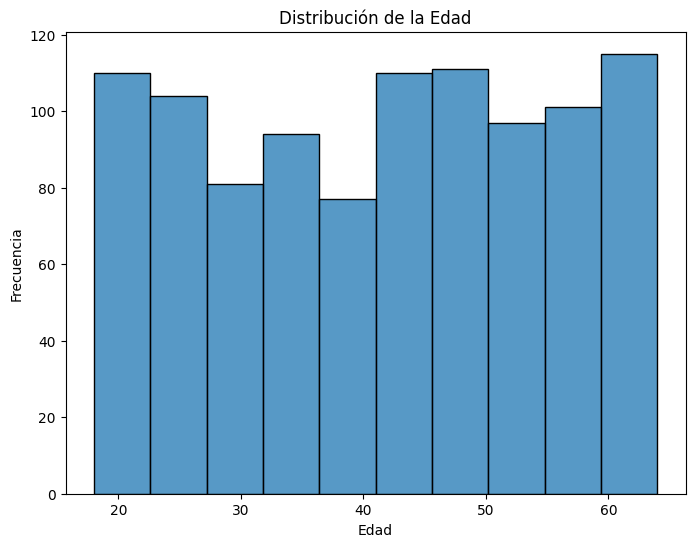

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=10)  # Ajusta 'bins' según sea necesario
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Interpretacion del Histograma.

interpretaciones comunes:

Las edades con mayor altura son las que mas compran y debemos apuntar todo nuetro marketing y esfuerzo empresarial a satisfacer este grupo etario.

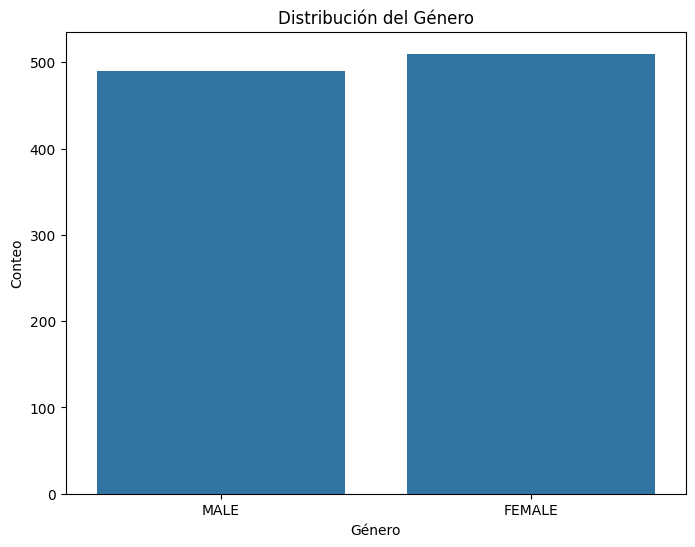

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribución del Género')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.show()

Podemos inferir.

Que nuestros clientes son mas mujeres que hombres.
Por lo cual tanto el Marketing como los productos deben dirigire mas a las Mujeres.

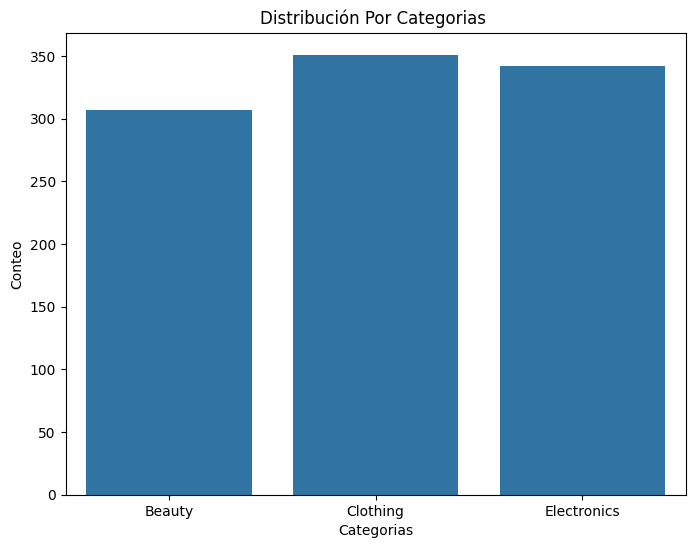

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Product Category', data=df)
plt.title('Distribución Por Categorias ')
plt.xlabel('Categorias')
plt.ylabel('Conteo')
plt.show()

Destacandose la categoria Clothing para nuestro apalancamiento de Marketing y la administracion de Inventario con Compras.

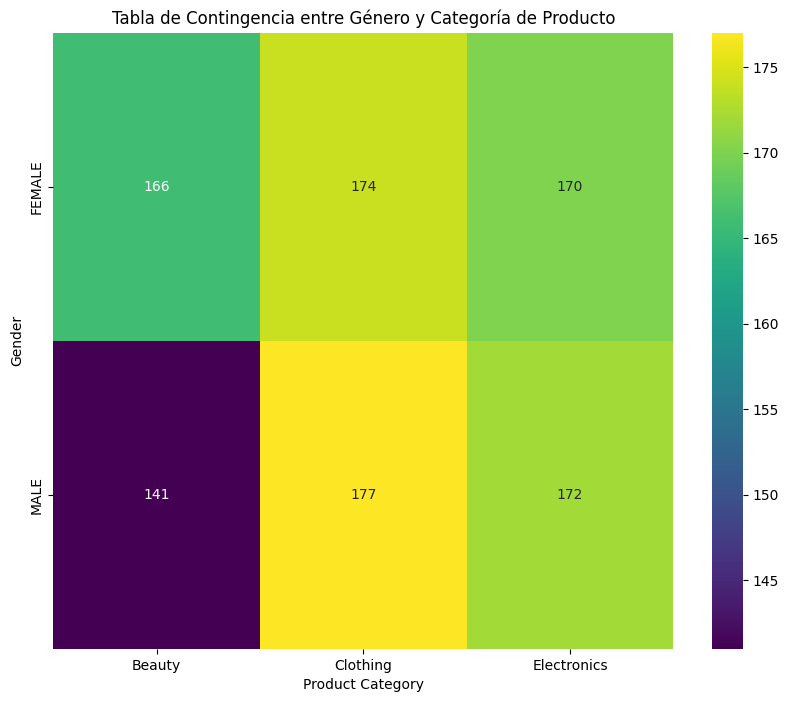

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame y 'Gender' y 'Product Category' son categóricas
contingency_table = pd.crosstab(df['Gender'], df['Product Category'])

# Visualizar con heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d')
plt.title('Tabla de Contingencia entre Género y Categoría de Producto')
plt.show()

<Figure size 1000x800 with 0 Axes>

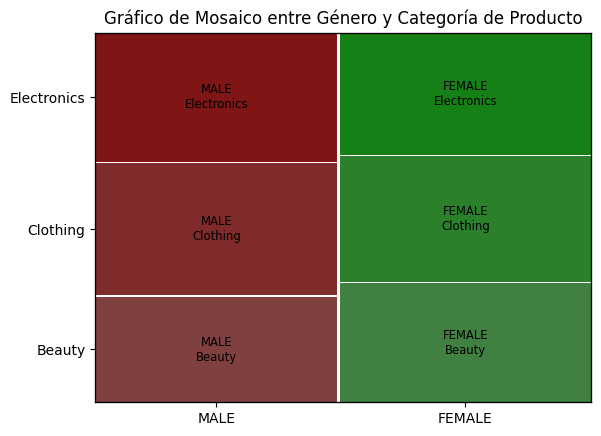

In [43]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame y 'Gender' y 'Product Category' son categóricas
plt.figure(figsize=(10, 8))
mosaic(df, ['Gender', 'Product Category'], title='Gráfico de Mosaico entre Género y Categoría de Producto')
plt.show()

Debido a la cantidad de datos CATEGORICOS hemos optado por otros modelos diferente al MAPA de Calor

Que nos dan una vision de la frecuencia y la asociacion entre categorias.
Lo que se puede observar mejor en los ultimos modelos de visualizacion.


Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

In [46]:
import pandas as pd
"""
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Transaction ID    1000 non-null   int64
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64
 7   Price per Unit    1000 non-null   int64
 8   Total Amount      1000 non-null   int64
 """


# Media
media_age = df['Age'].mean()
media_quantity = df['Quantity'].mean()
media_price = df['Price per Unit'].mean()
media_total = df['Total Amount'].mean()

# Mediana
mediana_age = df['Age'].median()
mediana_quantity = df['Quantity'].median()
mediana_prince = df['Price per Unit'].median()
mediana_total = df['Total Amount'].median()

# Moda (puede haber más de una)
moda_cusID = df['Customer ID'].mode()[0]  # Para variables categóricas
moda_gender = df['Gender'].mode()[0]
moda_productcat = df['Product Category'].mode()[0]

print(f"Media: {media_age}")
print(f"Media: {media_quantity}")
print(f"Media: {media_price}")
print(f"Media: {media_total}")
print(f"Mediana: {mediana_age}")
print(f"Mediana: {mediana_quantity}")
print(f"Mediana: {mediana_prince}")
print(f"Mediana: {mediana_total}")
print(f"Moda: {moda_cusID}")
print(f"Moda: {moda_gender}")
print(f"Moda: {moda_productcat}")

Media: 41.392
Media: 2.514
Media: 179.89
Media: 456.0
Mediana: 42.0
Mediana: 3.0
Mediana: 50.0
Mediana: 135.0
Moda: CUST001
Moda: FEMALE
Moda: Clothing


In [51]:
"""
# Media
media_age = df['Age'].mean()
media_quantity = df['Quantity'].mean()
media_price = df['Price per Unit'].mean()
media_total = df['Total Amount'].mean()
"""


# Rango
rango_age = df['Age'].max() - df['Age'].min()
rango_quantity  = df['Quantity'].max() - df['Quantity'].min()
rango_price = df['Price per Unit'].max() - df['Price per Unit'].min()
rango_total = df['Total Amount'].max() - df['Total Amount'].min()

# Desviación estándar
desviacion_estandar_age = df['Age'].std()
desviacion_estandar_quantity  = df['Quantity'].std()
desviacion_estandar_price = df['Price per Unit'].std()
desviacion_estandar_total = df['Total Amount'].std()


print(f"Rango AGE : {rango_age}")
print(f"Desviación estándar Age: {desviacion_estandar_age}")

print(f"Rango Quantity : {rango_quantity}")
print(f"Desviación estándar Quantity: {desviacion_estandar_quantity}")

print(f"Rango Price : {rango_price}")
print(f"Desviación estándar Price: {desviacion_estandar_price}")

print(f"Rango Total  : {rango_total}")
print(f"Desviación estándar Total : {desviacion_estandar_total}")


Rango AGE : 46
Desviación estándar Age: 13.681429659122532
Rango Quantity : 3
Desviación estándar Quantity: 1.1327343409145405
Rango Price : 475
Desviación estándar Price: 189.68135627129138
Rango Total  : 1975
Desviación estándar Total : 559.997631555123


In [50]:
resumen_estadistico = df.describe()
print(resumen_estadistico)

       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000000    900.000000  
max 

Si en el resumen de estadísticas de la columna "Age" (Edad) observas que la media es 46 y la desviación estándar es 13, puedes inferir que la edad promedio de los clientes es de 30 años, y que la mayoría de las edades se encuentran dentro de un rango de 11 años alrededor de la media.

Analisis Predictivo.

Implementación de Modelos:

Modelos de Regresión: Implementa modelos de Decision Tree Regressor y Random Forest Regressor.

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
X = df[['Age', 'Quantity', 'Product Category']]  #  variables
y = df['Price per Unit']  # variable objetivo

Dividir los datos en conjuntos de entrenameinto y prueba.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Ajusta test_size y random_state

Creacion del Modelo  y entrenamiento.

Transformar el indice Product Category para poder trabajar como si fuera numerico.

In [72]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.3 MB/s eta 0:00:00


In [73]:
import pandas as pd
X_encoded = pd.get_dummies(X, columns=['Product Category'], drop_first=True)

In [74]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X['Product_Encoded'] = encoder.fit_transform(X['Product Category'])

<ipython-input-74-1949e6c5695b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Product_Encoded'] = encoder.fit_transform(X['Product Category'])


In [78]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

# ... (your existing code for data loading and preprocessing)...

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit and transform the 'Product Category' column in both training and testing data
X_train['Product_Category_Encoded'] = encoder.fit_transform(X_train['Product Category'])
X_test['Product_Category_Encoded'] = encoder.transform(X_test['Product Category'])

# Now, drop the original 'Product Category' column
X_train = X_train.drop('Product Category', axis=1)
X_test = X_test.drop('Product Category', axis=1)

#

In [75]:
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['Product Category'])
X_encoded = encoder.fit_transform(X, y) # y is your target variable

Decision Tree Regressor:

In [79]:
tree_model = DecisionTreeRegressor(random_state=42)  # Puedes ajustar hiperparámetros
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [80]:
forest_model = RandomForestRegressor(random_state=42)  #  hiperparámetros
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [81]:
tree_predictions = tree_model.predict(X_test)
forest_predictions = forest_model.predict(X_test)

Optimización de Modelos: Utiliza GridSearchCV para optimizar los hiperparámetros de los modelos.

In [82]:
import pandas as pd
X_encoded = pd.get_dummies(X, columns=['Product Category'], drop_first=True)

Evaluación de Modelos: Evalúa los modelos utilizando métricas como MSE, RMSE, y R^2.

In [85]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

#

# Calcular métricas de evaluación para el Árbol de Decisión
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_rmse = tree_mse**0.5  # o usar np.sqrt(tree_mse)
tree_r2 = r2_score(y_test, tree_predictions)

# Calcular métricas de evaluación para el Bosque Aleatorio
forest_mse = mean_squared_error(y_test, forest_predictions)
forest_rmse = forest_mse**0.5  # o usar np.sqrt(forest_mse)
forest_r2 = r2_score(y_test, forest_predictions)

# Imprimir los resultados
print("Árbol de Decisión:")
print(f"  MSE: {tree_mse:.4f}")
print(f"  RMSE: {tree_rmse:.4f}")
print(f"  R^2: {tree_r2:.4f}")

print("\nBosque Aleatorio:")
print(f"  MSE: {forest_mse:.4f}")
print(f"  RMSE: {forest_rmse:.4f}")
print(f"  R^2: {forest_r2:.4f}")

Árbol de Decisión:
  MSE: 66291.8568
  RMSE: 257.4721
  R^2: -0.8595

Bosque Aleatorio:
  MSE: 51370.2010
  RMSE: 226.6500
  R^2: -0.4410


Entendiendo las Metricas.

MSE (Error Cuadrático Medio): Mide la diferencia cuadrática promedio entre los valores predichos y los valores reales. Valores más bajos indican un mejor rendimiento del modelo.
RMSE (Raíz del Error Cuadrático Medio): La raíz cuadrada del MSE, proporciona una métrica más interpretable en las mismas unidades que la variable objetivo.
R^2 (Coeficiente de Determinación): Representa la proporción de la varianza en la variable objetivo explicada por el modelo. Valores más altos (más cercanos a 1) indican un mejor ajuste.
Al comparar estas métricas para ambos modelos, puedes obtener una mejor comprensión de su rendimiento relativo y elegir el que mejor se adapte a tus necesidades.

Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.


Árbol de Decisión:
  MSE: 66291.8568
  RMSE: 257.4721
  R^2: -0.8595

Bosque Aleatorio:
  MSE: 51370.2010
  RMSE: 226.6500
  R^2: -0.4410

Comparando ambos modelos.
El Bosque Aleatorio muestra un MSE y RMSE mas bajo al Arbol de Decision por lo que tiene un mejor rendimiento.
En promedio sus predicciones son mas cercanas a los valores reales.
Aemas su R2 mas alto significa que explica una mayor proporcion de la varianza en la variable objetivo.

Conclusion
Basándonos en estas métricas, el Bosque Aleatorio sería el modelo más adecuado para este dataset. Generalmente, los Bosques Aleatorios tienden a generalizar mejor y ser menos propensos al sobreajuste que los Árboles de Decisión individuales, lo que se refleja en su mejor rendimiento en este caso.

**Consideraciones Adicionales:**

Complejidad del Modelo: Los Bosques Aleatorios son más complejos que los Árboles de Decisión, lo que puede implicar un mayor tiempo de entrenamiento y recursos computacionales.
Interpretabilidad: Los Árboles de Decisión son más fáciles de interpretar que los Bosques Aleatorios. Si la interpretabilidad es crucial, podrías considerar el Árbol de Decisión, aunque su rendimiento sea ligeramente inferior.

**Recomendación:**

Para tu dataset, el Bosque Aleatorio parece ser la mejor opción, dado su superior rendimiento en las métricas evaluadas. Sin embargo, es importante tener en cuenta las consideraciones adicionales y experimentar con diferentes configuraciones de hiperparámetros para ambos modelos para obtener los mejores resultados.

Gracias.

Raul De Los Santos Caceres Penayo
Coding Dojo
20-11-2024